# BDENG project SS2024

## Topic

Das Hauptziel ist es, zu überprüfen, ob es einen Zusammenhang zwischen CO2-Emissionen, Temperatur und der Summe der neu zugelassenen/benutzten Autos in Österreich (seit 2000) gibt.

Für das BDENG-Projekt wollen wir Autodaten aus verschiedenen Quellen erhalten und prüfen, ob sie mit den verfügbaren Daten aus verschiedenen Quellen übereinstimmen. Wir haben einen Satz von Neu- und Gebrauchtwagenzulassungen und wollen prüfen, ob die Anzahl mit den öffentlich zugänglichen Statistiken von https://www.statistik.at/statistiken/tourismus-und-verkehr/fahrzeuge/kfz-bestand übereinstimmt, die wir über Webscrape erhalten haben.
Da wir keine gut passende API gefunden haben, haben wir unsere eigene geschrieben.


Members: Grégoire Bartek, Matthias Huber, David Berger


# Data Sources

## Webscraping

Car count of registrations (Webscraping)

https://www.statistik.at/statistiken/tourismus-und-verkehr/fahrzeuge/kfz-bestand

## CSV

emission data: https://www.data.gv.at/katalog/dataset/bd462a04-2453-4c76-95bb-cfbd043540f5#resources . For the emission data it was important to use emission data only from passenger vehicles, since we get the registration data from normal "PKWs". The NFR emission category for passenger vehicles is 1A3b1.



AT new registered cars: https://www.data.gv.at/katalog/de/dataset/stat_pkw-neuzulassungen-nach-marken-ab-janner-2000#resources

AT used registered cars: https://www.data.gv.at/katalog/dataset/6fc1c927-bf21-3d72-9333-a9055493ab3c#additional-info



## API

In [6]:
!pip install flask requests
!pip install flask-cors

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


Das Skript erstellt eine REST-API mit Flask, die Endpunkte für Temperatur- und Emissionsdaten bereitstellt. Die Daten werden im JSON-Format bereitgestellt, und der Zugriff auf die API kann von jedem beliebigen Ursprung aus erfolgen, da CORS aktiviert ist. Die Flask-Anwendung wird in einem separaten Thread ausgeführt, so dass sie asynchron arbeiten kann.

In [7]:
import pandas as pd  # Bibliothek für Datenmanipulation
from flask import Flask, jsonify  # Flask-Bibliothek für Webanwendungen und JSON-Antworten
from flask_cors import CORS  # Flask-Erweiterung für Cross-Origin Resource Sharing
import threading  # Bibliothek für parallele Programmierung

# Quelle der Daten: https://www.iea.org/data-and-statistics/charts/temperature-in-austria-2000-2020
temperature_data = [
    {"year": 2000, "avg_temp": 6.5},
    {"year": 2001, "avg_temp": 6.2},
    {"year": 2002, "avg_temp": 7.0},
    {"year": 2003, "avg_temp": 7.2},
    {"year": 2004, "avg_temp": 6.6},
    {"year": 2005, "avg_temp": 6.8},
    {"year": 2006, "avg_temp": 6.5},
    {"year": 2007, "avg_temp": 7.4},
    {"year": 2008, "avg_temp": 6.3},
    {"year": 2009, "avg_temp": 6.9},
    {"year": 2010, "avg_temp": 6.1},
    {"year": 2011, "avg_temp": 6.5},
    {"year": 2012, "avg_temp": 6.4},
    {"year": 2013, "avg_temp": 7.0},
    {"year": 2014, "avg_temp": 7.3},
    {"year": 2015, "avg_temp": 7.5},
    {"year": 2016, "avg_temp": 7.2},
    {"year": 2017, "avg_temp": 7.4},
    {"year": 2018, "avg_temp": 7.8},
    {"year": 2019, "avg_temp": 7.1},
    {"year": 2020, "avg_temp": 6.9},
]

emission_data = [
    {"year": 2000, "emissions": 7.3015565276},
    {"year": 2001, "emissions": 7.3445498509},
    {"year": 2002, "emissions": 7.5910820191},
    {"year": 2003, "emissions": 7.6661065819},
    {"year": 2004, "emissions": 7.9264551349},
    {"year": 2005, "emissions": 8.022971702},
    {"year": 2006, "emissions": 8.247301388},
    {"year": 2007, "emissions": 8.3558799857},
    {"year": 2008, "emissions": 8.4741724795},
    {"year": 2009, "emissions": 8.4774061324},
    {"year": 2010, "emissions": 8.3759737748},
    {"year": 2011, "emissions": 8.4235682823},
    {"year": 2012, "emissions": 8.7662938718},
    {"year": 2013, "emissions": 9.291035915},
    {"year": 2014, "emissions": 9.8128903391},
    {"year": 2015, "emissions": 10.1173860799},
    {"year": 2016, "emissions": 10.4965465177},
    {"year": 2017, "emissions": 10.8414736715},
    {"year": 2018, "emissions": 10.6853845334},
    {"year": 2019, "emissions": 10.6693128165},
    {"year": 2020, "emissions": 10.9580914025},
]

# Konvertierung der Temperatur- und Emissionsdaten in pandas DataFrames
df_temp = pd.DataFrame(temperature_data)
df_emission = pd.DataFrame(emission_data)

# Initialisierung der Flask-Anwendung
app = Flask(__name__)
CORS(app)  # Aktivierung von Cross-Origin Resource Sharing (CORS)

# Definieren des API-Endpunkts für Temperaturdaten
@app.route('/api/temperature', methods=['GET'])
def get_temperature():
    return jsonify(df_temp.to_dict(orient='records'))

# Definieren des API-Endpunkts für Emissionsdaten
@app.route('/api/emissions', methods=['GET'])
def get_emissions():
    return jsonify(df_emission.to_dict(orient='records'))

# Funktion zum Ausführen der Flask-Anwendung
def run_app():
    app.run(host='0.0.0.0', port=5001)

# Starten der Flask-Anwendung in einem separaten Thread
thread = threading.Thread(target=run_app)
thread.start()


 * Serving Flask app '__main__'
 * Debug mode: off


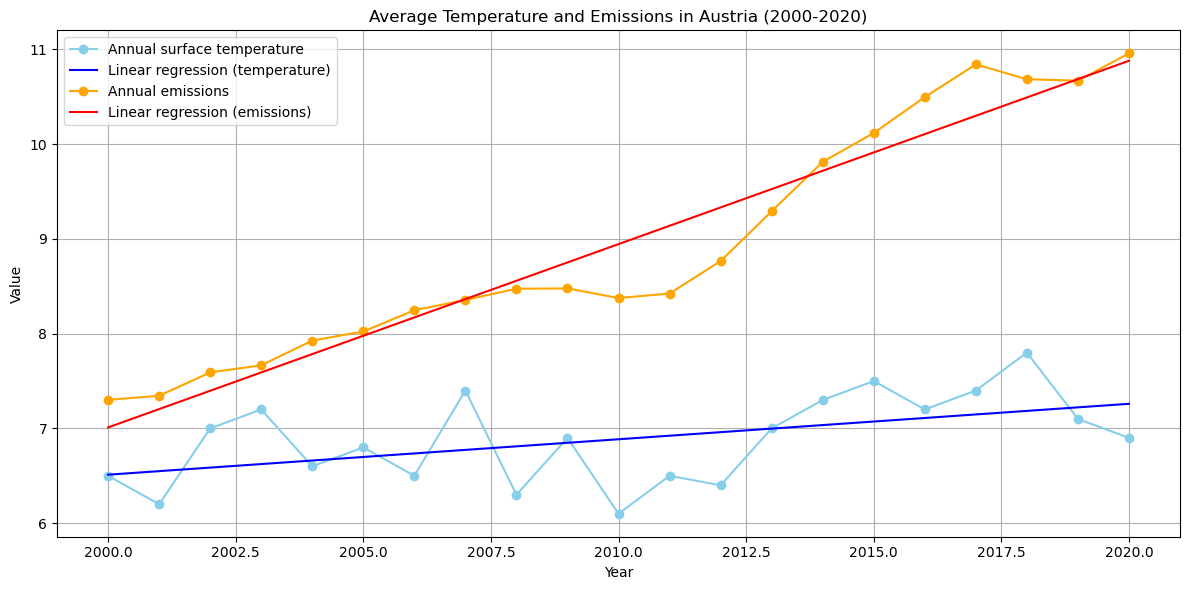

In [8]:
import requests  # Bibliothek für HTTP-Anfragen
import matplotlib.pyplot as plt  # Bibliothek zum Erstellen von Diagrammen
import numpy as np  # Bibliothek für numerische Berechnungen

# Anfrage an den lokalen API-Endpunkt für Temperaturdaten
response_temp = requests.get('http://localhost:5001/api/temperature')
# Anfrage an den lokalen API-Endpunkt für Emissionsdaten
response_emission = requests.get('http://localhost:5001/api/emissions')

# Überprüfen, ob beide Anfragen erfolgreich waren
if response_temp.status_code == 200 and response_emission.status_code == 200:
    # JSON-Daten der Temperaturanfrage in ein Python-Objekt umwandeln
    temp_data = response_temp.json()
    # JSON-Daten der Emissionsanfrage in ein Python-Objekt umwandeln
    emission_data = response_emission.json()

    # JSON-Daten in pandas DataFrames umwandeln
    df_temp = pd.DataFrame(temp_data)
    df_emission = pd.DataFrame(emission_data)

    # Eine neue Figur für das Diagramm erstellen
    plt.figure(figsize=(12, 6))

    # Temperaturdaten plotten
    plt.plot(df_temp['year'], df_temp['avg_temp'], marker='o', color='skyblue', label='Annual surface temperature')

    # Lineare Regression für die Temperaturdaten berechnen und plotten
    z_temp = np.polyfit(df_temp['year'], df_temp['avg_temp'], 1)
    p_temp = np.poly1d(z_temp)
    plt.plot(df_temp['year'], p_temp(df_temp['year']), linestyle='-', color='blue', label='Linear regression (temperature)')

    # Emissionsdaten plotten
    plt.plot(df_emission['year'], df_emission['emissions'], marker='o', color='orange', label='Annual emissions')

    # Lineare Regression für die Emissionsdaten berechnen und plotten
    z_emission = np.polyfit(df_emission['year'], df_emission['emissions'], 1)
    p_emission = np.poly1d(z_emission)
    plt.plot(df_emission['year'], p_emission(df_emission['year']), linestyle='-', color='red', label='Linear regression (emissions)')

    # Titel und Achsenbeschriftungen für das Diagramm festlegen
    plt.title('Average Temperature and Emissions in Austria (2000-2020)')
    plt.xlabel('Year')
    plt.ylabel('Value')

    # Legende hinzufügen
    plt.legend()

    # Gitterlinien hinzufügen
    plt.grid(True)

    # Layout anpassen und Diagramm anzeigen
    plt.tight_layout()
    plt.show()
else:
    # Fehlernachrichten ausgeben, wenn die Anfragen nicht erfolgreich waren
    print(f"Error: Temperature data request status code: {response_temp.status_code}")
    print(f"Error: Emissions data request status code: {response_emission.status_code}")


### Durchschnittstemperatur und Emissionen in Österreich (2000-2020)

- **Jährliche Oberflächentemperatur**:
  - Die Daten zeigen Schwankungen ohne starken konstanten Trend nach oben oder unten, aber ein leichter Anstieg ist zu erkennen, wenn man die lineare Regressionslinie betrachtet.

- **Jährliche Emissionen**:
  - Es gibt einen klaren steigenden Trend bei den Emissionen von 2000 bis 2020, wie sowohl durch die Datenpunkte als auch durch die lineare Regressionslinie dargestellt.

Diese Visualisierung kommuniziert effektiv den Unterschied in den Trends zwischen der durchschnittlichen Oberflächentemperatur und den Emissionen in Österreich über den angegebenen Zeitraum. Die linearen Regressionslinien helfen, die allgemeine Richtung und das Ausmaß der Veränderung für jedes Datenset zu verstehen.


## CSV

## Getting the csv emission data

In [1]:
import pandas as pd
import json

# Load the data
file_path = 'emissions/schadstoffemissionen_1990-2022_nach_nfr_wide_1a3b1.csv'
df = pd.read_csv(file_path)

# Filter the row which contains "CO" in the second column and "1 A 3 b 1" in the fourth column
filtered_row = df[(df.iloc[:, 1] == 'CO') & (df.iloc[:, 3] == '1 A 3 b 1')]

# Extract the CO2 data between 2000 and 2022
co2_data_row = filtered_row.iloc[0, 7:40].values  # Adjusting the column indices to match the correct range

# Create a dictionary for the emission data
years = list(range(2000, 2023))
emission_data = {str(year): co2_data_row[i] for i, year in enumerate(years)}

# Save the data as JSON in a data field
emission_data_json = json.dumps([emission_data])

# Output the result
emission_data_json

'[{"2000": 464.972528567772, "2001": 470.133013625862, "2002": 409.771876603363, "2003": 355.593461528384, "2004": 311.225493974292, "2005": 272.136953998124, "2006": 227.528584604822, "2007": 194.499155724662, "2008": 184.55170027124, "2009": 154.911973034974, "2010": 137.215676347278, "2011": 128.747034707141, "2012": 131.002449224655, "2013": 127.390600538148, "2014": 117.411407668618, "2015": 108.623840644296, "2016": 90.3129052678576, "2017": 85.0779201091475, "2018": 76.0917499116289, "2019": 71.2990178322923, "2020": 66.4987898133564, "2021": 60.6416771923102, "2022": 56.728338323236}]'

In [9]:
from pyspark.sql import SparkSession
import pandas as pd
import matplotlib.pyplot as plt

# Starten einer Spark Session
spark = SparkSession.builder \
    .appName("Emission Data Visualization") \
    .getOrCreate()

24/06/26 21:12:15 WARN Utils: Your hostname, MacBook-Pro-von-Gregoire.local resolves to a loopback address: 127.0.0.1; using 192.168.0.248 instead (on interface en0)
24/06/26 21:12:15 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/06/26 21:12:15 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/06/26 21:12:15 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
24/06/26 21:12:15 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.


In [10]:
emission_data = [{"2000": 464.972528567772, "2001": 470.133013625862, "2002": 409.771876603363, "2003": 355.593461528384, "2004": 311.225493974292, "2005": 272.136953998124, "2006": 227.528584604822, "2007": 194.499155724662, "2008": 184.55170027124, "2009": 154.911973034974, "2010": 137.215676347278, "2011": 128.747034707141, "2012": 131.002449224655, "2013": 127.390600538148, "2014": 117.411407668618, "2015": 108.623840644296, "2016": 90.3129052678576, "2017": 85.0779201091475, "2018": 76.0917499116289, "2019": 71.2990178322923, "2020": 66.4987898133564, "2021": 60.6416771923102, "2022": 56.728338323236}]

In [11]:
pdf = pd.DataFrame(emission_data)

In [12]:
sdf = spark.createDataFrame(pdf)

In [13]:
sdf.show()

+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+---------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+---------------+
|            2000|            2001|            2002|            2003|            2004|            2005|            2006|            2007|           2008|            2009|            2010|            2011|            2012|            2013|            2014|            2015|            2016|            2017|            2018|            2019|            2020|            2021|           2022|
+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+---------------+----------------+----------------+----------------+--------------

In [14]:
pdf_viz = sdf.toPandas()

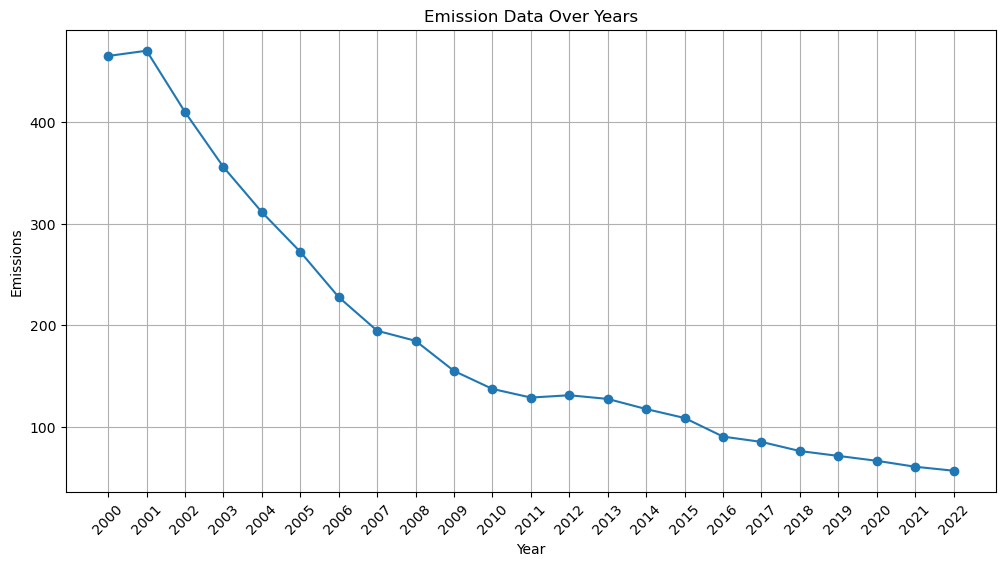

In [15]:
# Erstellen einer neuen Figur mit den Abmessungen 12x6 Zoll
plt.figure(figsize=(12, 6))

# Plotten der Emissionsdaten für das erste Jahr mit Markierungen ('o')
plt.plot(pdf_viz.columns, pdf_viz.iloc[0], marker='o')

# Titel für das Diagramm festlegen
plt.title('Emission Data Over Years')

# Beschriftung der x-Achse
plt.xlabel('Year')

# Beschriftung der y-Achse
plt.ylabel('Emissions')

# Aktivieren des Gitters im Diagramm
plt.grid(True)

# Drehen der x-Achsen-Beschriftungen um 45 Grad
plt.xticks(rotation=45)

# Anzeigen des Diagramms
plt.show()


### Emissionsdaten über die Jahre

Die Grafik "Emission Data Over Years" zeigt den Verlauf der Emissionswerte von 2000 bis 2022. Hier sind die wesentlichen Punkte der Interpretation:

1. **Allgemeiner Trend**:
   - Es ist ein deutlicher Abwärtstrend der Emissionen zu beobachten. Die Emissionswerte sinken kontinuierlich von über 450 im Jahr 2000 auf unter 50 im Jahr 2022. Dies deutet auf eine erhebliche Reduktion der Emissionen im Laufe der Jahre hin.

2. **Jährliche Veränderungen**:
   - Zu Beginn des Zeitraums (2000 bis 2004) sind die Emissionswerte besonders hoch, mit einem schnellen Rückgang in den folgenden Jahren.
   - Ab etwa 2005 verlangsamt sich der Rückgang der Emissionen, jedoch bleibt der abnehmende Trend konstant.
   - Zwischen 2010 und 2015 stabilisieren sich die Emissionswerte etwas, bevor sie wieder einen leichten Rückgang aufweisen.

3. **Mögliche Ursachen**:
   - Der starke Rückgang der Emissionen könnte auf verschiedene Umweltmaßnahmen, technologische Fortschritte, regulatorische Änderungen oder ein verändertes Bewusstsein für Umweltschutz in Österreich zurückzuführen sein.
   - Es könnte auch eine Verlagerung von emissionsintensiven Industrien zu umweltfreundlicheren Alternativen gegeben haben.

4. **Bedeutung der Reduktion**:
   - Die signifikante Abnahme der Emissionswerte ist ein positives Zeichen für die Umwelt und weist darauf hin, dass Maßnahmen zur Reduktion von Emissionen erfolgreich umgesetzt wurden.
   - Diese Reduktion könnte auch Auswirkungen auf die Luftqualität, die öffentliche Gesundheit und das Klima haben.


In [16]:
file_path = "newcars/overalldata_new.csv"
df = spark.read.csv(file_path, header=False, inferSchema=True)

In [17]:
df.printSchema()
df.show(5)

columns = ['Column1', 'C-A10-0', 'Column3', 'NewCars']
df = df.toDF(*columns)

df.show()

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: integer (nullable = true)

+-------+----------+-----+---+
|    _c0|       _c1|  _c2|_c3|
+-------+----------+-----+---+
|J59-225|A10-200805|EK7-1|  5|
|J59-225|A10-200806|EK7-1|  4|
|J59-225|A10-200807|EK7-1| 20|
|J59-225|A10-200808|EK7-1| 15|
|J59-225|A10-200809|EK7-1| 11|
+-------+----------+-----+---+
only showing top 5 rows

+-------+----------+-------+-------+
|Column1|   C-A10-0|Column3|NewCars|
+-------+----------+-------+-------+
|J59-225|A10-200805|  EK7-1|      5|
|J59-225|A10-200806|  EK7-1|      4|
|J59-225|A10-200807|  EK7-1|     20|
|J59-225|A10-200808|  EK7-1|     15|
|J59-225|A10-200809|  EK7-1|     11|
|J59-225|A10-200810|  EK7-1|     38|
|J59-225|A10-200811|  EK7-1|     28|
|J59-225|A10-200812|  EK7-1|     13|
|J59-209|A10-200807|  EK7-1|      1|
|J59-209|A10-202211|  EK7-1|      1|
|  J59-3|A10-200001|  EK7-1|    336|
|  J59-3|A10-200002|  EK7-1|   

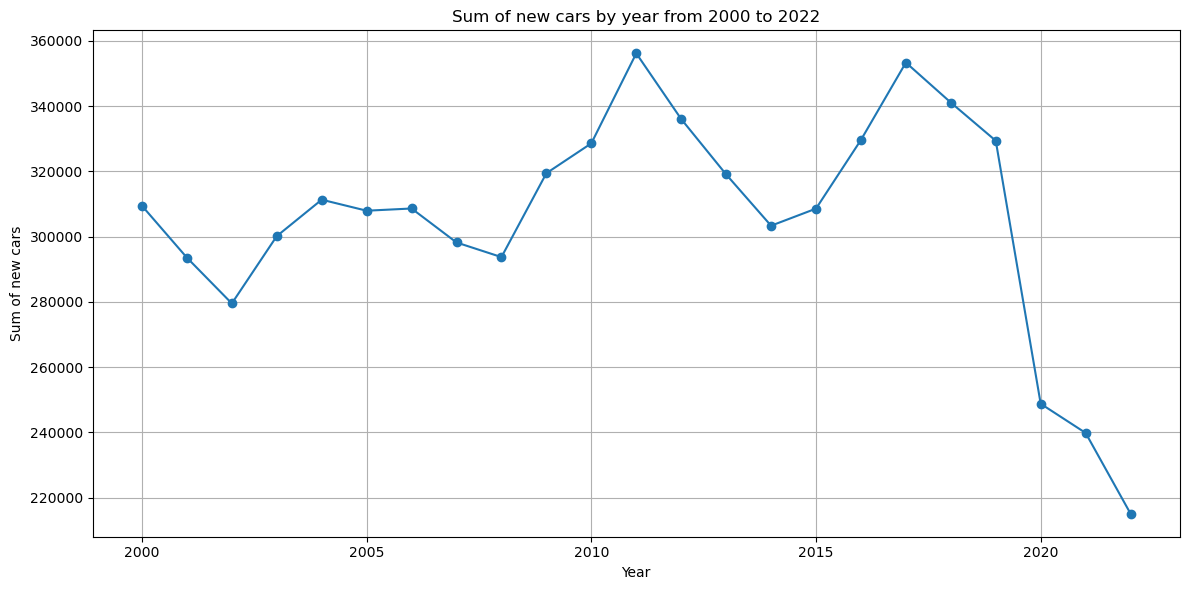

+----+------+
|Year|   Sum|
+----+------+
|2000|309427|
|2001|293528|
|2002|279493|
|2003|300121|
|2004|311292|
|2005|307915|
|2006|308594|
|2007|298182|
|2008|293697|
|2009|319403|
|2010|328563|
|2011|356145|
|2012|336010|
|2013|319035|
|2014|303318|
|2015|308555|
|2016|329604|
|2017|353320|
|2018|341068|
|2019|329363|
+----+------+
only showing top 20 rows



In [18]:
# Konvertierung des Spark DataFrame in ein pandas DataFrame
pdf = df.toPandas()

# Anzeige der ersten Zeilen des pandas DataFrame
pdf.head()

# Extrahieren des Jahres aus der 'C-A10-0' Spalte und Konvertierung in einen Integer
pdf['Year'] = pdf['C-A10-0'].str[4:8].astype(int)

# Konvertierung der 'NewCars' Spalte in numerische Werte, ungültige Werte werden als NaN behandelt
pdf['NewCars'] = pd.to_numeric(pdf['NewCars'], errors='coerce')

# Entfernen der Zeilen, die NaN-Werte in der 'NewCars' Spalte enthalten
pdf = pdf.dropna(subset=['NewCars'])

# Gruppieren der Daten nach Jahr und Berechnung der Summe der neuen Autos pro Jahr
yearly_sum = pdf.groupby('Year')['NewCars'].sum().reset_index()
yearly_sum.columns = ['Year', 'Sum']

# Filtern der Daten für die Jahre 2000 bis 2022
filtered_data = yearly_sum[(yearly_sum['Year'] >= 2000) & (yearly_sum['Year'] <= 2022)]

# Überprüfen, ob gefilterte Daten vorhanden sind
if not filtered_data.empty:
    # Plotten der Daten
    plt.figure(figsize=(12, 6))
    plt.plot(filtered_data['Year'], filtered_data['Sum'], marker='o')
    plt.title('Sum of new cars by year from 2000 to 2022')
    plt.xlabel('Year')
    plt.ylabel('Sum of new cars')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Konvertierung des gefilterten pandas DataFrame zurück in ein Spark DataFrame
    filtered_sdf = spark.createDataFrame(filtered_data)

    # Anzeige der ersten Zeilen des gefilterten Spark DataFrame
    filtered_sdf.show()
else:
    print("Keine Daten für die angegebenen Jahre 2000 bis 2022 gefunden.")


### Summe der Neuwagen nach Jahr (2000-2022)

Die Grafik "Sum of new cars by year from 2000 to 2022" zeigt die jährliche Summe neu zugelassener Autos im Zeitraum von 2000 bis 2022. Hier sind die wesentlichen Punkte der Interpretation:

1. **Allgemeiner Trend**:
   - Die Anzahl der neu zugelassenen Autos schwankt im dargestellten Zeitraum. Es gibt sowohl Perioden des Anstiegs als auch des Rückgangs, was auf unterschiedliche Marktbedingungen, wirtschaftliche Faktoren und möglicherweise regulatorische Änderungen hinweisen könnte.

2. **Jährliche Veränderungen**:
   - Zu Beginn des Zeitraums, zwischen 2000 und 2005, zeigt die Grafik eine Abnahme der jährlichen Neuzulassungen von Autos.
   - Von 2005 bis 2010 gibt es einen leichten Anstieg und Stabilisierung der Zahlen.
   - Ein markanter Anstieg ist zwischen 2010 und 2012 zu beobachten, gefolgt von einem weiteren signifikanten Anstieg bis 2015.
   - Nach 2015 fällt die Anzahl der Neuzulassungen deutlich ab, insbesondere nach 2019. Dies könnte auf wirtschaftliche Abschwünge, Veränderungen im Verbraucherverhalten oder neue gesetzliche Vorschriften zurückzuführen sein.

3. **Mögliche Ursachen für Veränderungen**:
   - **Wirtschaftliche Bedingungen**: Wirtschaftliche Rezessionen oder Booms können das Kaufverhalten beeinflussen und somit die Anzahl der Neuzulassungen beeinflussen.
   - **Regulatorische Änderungen**: Einführung von Umweltvorschriften oder steuerlichen Anreizen/Strafabgaben könnten die Verkaufszahlen neuer Autos beeinflusst haben.
   - **Technologische Fortschritte**: Neue Technologien und Modelle könnten in bestimmten Jahren zu höheren Verkaufszahlen geführt haben.

4. **Besondere Beobachtungen**:
   - Der deutliche Rückgang nach 2019 könnte auch mit globalen Ereignissen wie der COVID-19-Pandemie zusammenhängen, die die Automobilindustrie stark beeinflusst hat.
   - Die Schwankungen über die Jahre zeigen die Volatilität des Automobilmarktes und die Sensibilität gegenüber externen Einflüssen.


In [20]:
emission_df = pd.DataFrame(emission_data).T
emission_df.columns = ['Emissions']
emission_df.index.name = 'Year'
emission_df.reset_index(inplace=True)
emission_df['Year'] = emission_df['Year'].astype(int)

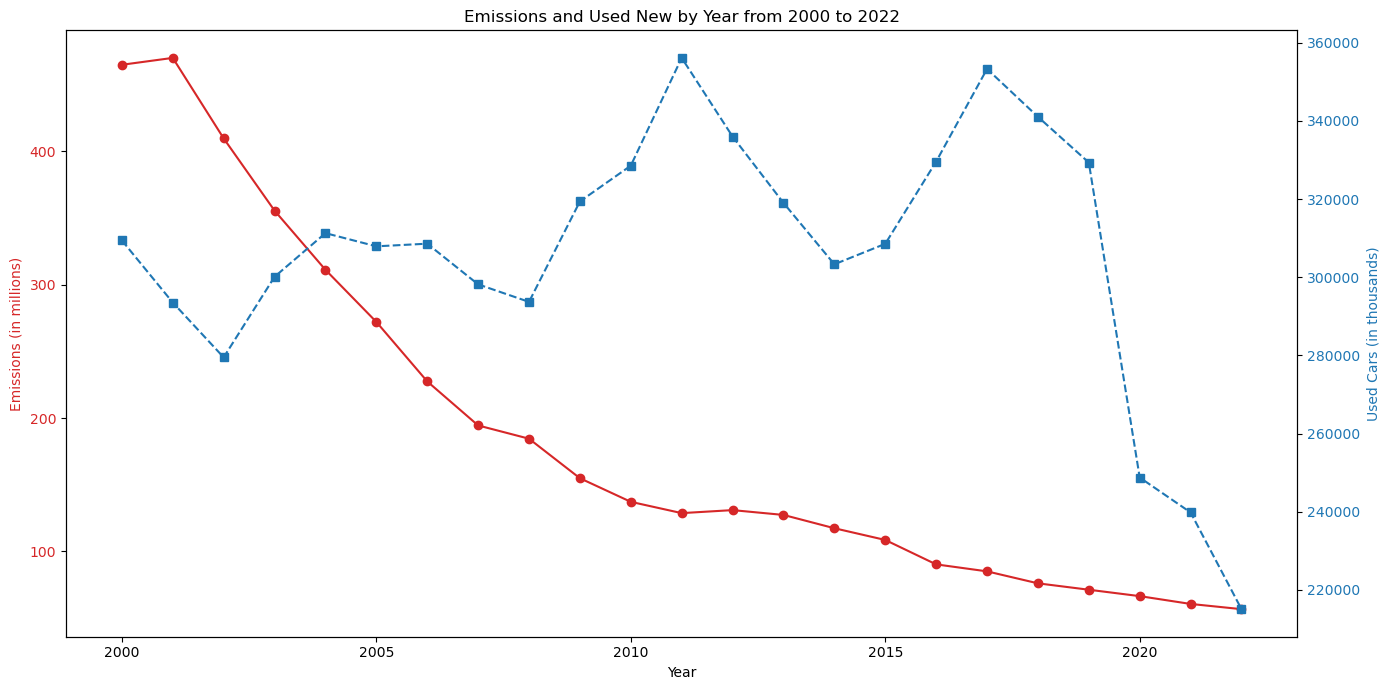

In [21]:
# Zusammenführen der Emissionsdaten und der gefilterten Neuwagen-Daten basierend auf dem Jahr
combined_df = pd.merge(emission_df, filtered_data, on='Year', how='inner')

# Plotten der Daten
fig, ax1 = plt.subplots(figsize=(14, 7))  # Erstellen einer Figur und einer Achse mit den Abmessungen 14x7 Zoll

color = 'tab:red'
ax1.set_xlabel('Year')  # Beschriftung der x-Achse
ax1.set_ylabel('Emissions (in millions)', color=color)  # Beschriftung der linken y-Achse mit Farbe rot
ax1.plot(combined_df['Year'], combined_df['Emissions'], color=color, marker='o', linestyle='-', label='Emissions (in millions)')  # Plotten der Emissionsdaten
ax1.tick_params(axis='y', labelcolor=color)  # Festlegen der Farbe der y-Achsen-Beschriftungen auf rot

# Erstellen einer zweiten y-Achse, die die gleiche x-Achse teilt
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Used Cars (in thousands)', color=color)  # Beschriftung der rechten y-Achse mit Farbe blau
ax2.plot(combined_df['Year'], combined_df['Sum'], color=color, marker='s', linestyle='--', label='New Cars (in thousands)')  # Plotten der Neuwagen-Daten
ax2.tick_params(axis='y', labelcolor=color)  # Festlegen der Farbe der y-Achsen-Beschriftungen auf blau

# Festlegen des Titels der Grafik
plt.title('Emissions and New Cars by Year from 2000 to 2022')
fig.tight_layout()  # Optimierung des Layouts für eine bessere Darstellung
plt.show()  # Anzeigen der Grafik


### Emissionen und Neuwagen nach Jahr (2000-2022)

Die Grafik "Emissions and Used New by Year from 2000 to 2022" stellt zwei Datensätze dar: die Emissionen (in Millionen) und die Anzahl neuer Autos (in Tausend) über den Zeitraum von 2000 bis 2022. Hier sind die wesentlichen Punkte der Interpretation:

1. **Emissionsdaten**:
   - **Allgemeiner Trend**:
     - Die Emissionen zeigen einen deutlichen Abwärtstrend. Im Jahr 2000 liegen die Emissionen über 400 Millionen und sinken kontinuierlich auf unter 100 Millionen im Jahr 2022.
   - **Besondere Beobachtungen**:
     - Zwischen 2000 und 2010 ist ein schneller Rückgang zu beobachten. Danach verlangsamt sich der Rückgang, bleibt aber stetig.
   - **Mögliche Ursachen**:
     - Der Rückgang der Emissionen könnte auf strengere Umweltvorschriften, den Wechsel zu saubereren Energien und Technologien sowie auf eine verbesserte Effizienz in verschiedenen Industrien zurückzuführen sein.

2. **Neuwagen-Daten**:
   - **Allgemeiner Trend**:
     - Die Anzahl der neu zugelassenen Autos zeigt einen schwankenden Verlauf. Es gibt sowohl Perioden des Anstiegs als auch des Rückgangs.
   - **Besondere Beobachtungen**:
     - Die höchsten Zahlen neuer Autos sind um 2010 und erneut um 2015 zu verzeichnen, gefolgt von einem drastischen Rückgang nach 2019.
     - Der Rückgang nach 2019 könnte durch globale Ereignisse wie die COVID-19-Pandemie beeinflusst worden sein.
   - **Mögliche Ursachen**:
     - Wirtschaftliche Bedingungen, Änderungen in den Verbraucherpräferenzen und neue Modelle oder Technologien könnten diese Schwankungen verursacht haben.

3. **Korrelation zwischen Emissionen und Neuwagen**:
   - Es gibt keine offensichtliche Korrelation zwischen den Emissionen und der Anzahl neuer Autos.
   - Während die Emissionen kontinuierlich sinken, zeigen die Neuwagen-Daten keine klaren langfristigen Trends, sondern eher kurzzeitige Schwankungen.

4. **Zusammenfassung**:
   - Die Grafik zeigt zwei unterschiedliche Geschichten: Die kontinuierliche und signifikante Reduktion der Emissionen im Laufe der Jahre und die schwankende Anzahl neuer Autos.
   - Die Reduktion der Emissionen ist ein positives Zeichen für die Umwelt und deutet auf erfolgreiche Maßnahmen zur Emissionsminderung hin.
   - Die Schwankungen in den Neuwagen-Daten spiegeln wahrscheinlich wirtschaftliche und technologische Veränderungen sowie globale Ereignisse wider.


In [22]:
file_path = "usedcars/overalldata_used.csv"  # Definiert den Pfad zur CSV-Datei mit den Daten zu gebrauchten Autos
df = spark.read.csv(file_path, header=False, inferSchema=True)  # Liest die CSV-Datei als Spark DataFrame ein, ohne Kopfzeilen und mit automatischer Schema-Erkennung

# Definiert die Spaltennamen des DataFrames
columns = ['Column1', 'C-A10-0', 'Column3', 'UsedCars']
df = df.toDF(*columns)  # Weist dem DataFrame die neuen Spaltennamen zu

pdf = df.toPandas()  # Konvertiert den Spark DataFrame in ein pandas DataFrame

# Extrahiert das Jahr aus der 'C-A10-0' Spalte und konvertiert es in einen Integer
pdf['Year'] = pdf['C-A10-0'].str[4:8].astype(int)

# Konvertiert die 'UsedCars' Spalte in numerische Werte, ungültige Werte werden als NaN behandelt
pdf['UsedCars'] = pd.to_numeric(pdf['UsedCars'], errors='coerce')

# Entfernt Zeilen, die NaN-Werte in der 'UsedCars' Spalte enthalten
pdf = pdf.dropna(subset=['UsedCars'])

# Gruppiert die Daten nach Jahr und berechnet die Summe der gebrauchten Autos pro Jahr
yearly_sum = pdf.groupby('Year')['UsedCars'].sum().reset_index()
yearly_sum.columns = ['Year', 'Sum']  # Benennt die Spalten des resultierenden DataFrames um

# Filtert die Daten für die Jahre 2000 bis 2022
filtered_data = yearly_sum[(yearly_sum['Year'] >= 2000) & (yearly_sum['Year'] <= 2022)]


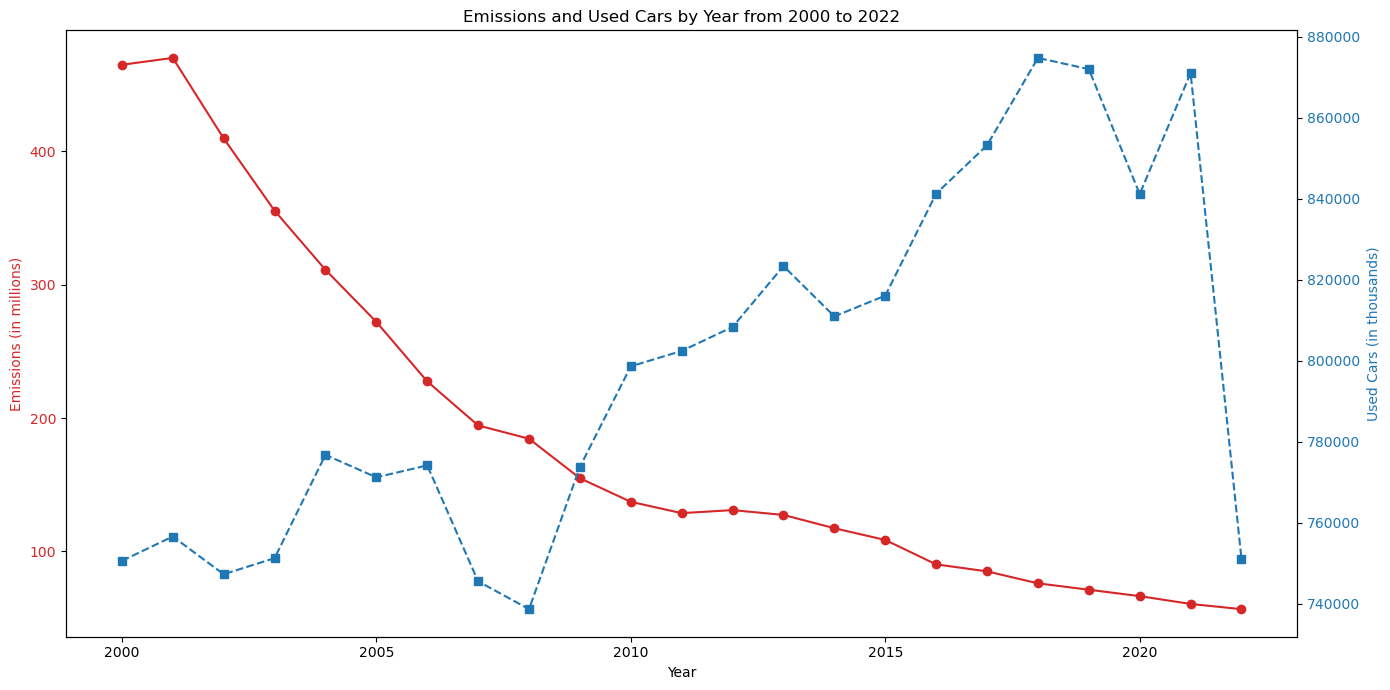

In [23]:
# Zusammenführen der Emissionsdaten und der gefilterten Gebrauchtwagen-Daten basierend auf dem Jahr
combined_df = pd.merge(emission_df, filtered_data, on='Year', how='inner')

# Erstellen einer Figur und einer Achse mit den Abmessungen 14x7 Zoll
fig, ax1 = plt.subplots(figsize=(14, 7))

# Festlegen der Farbe für die Emissionsdaten
color = 'tab:red'
ax1.set_xlabel('Year')  # Beschriftung der x-Achse
ax1.set_ylabel('Emissions (in millions)', color=color)  # Beschriftung der linken y-Achse und Festlegen der Farbe auf rot
ax1.plot(combined_df['Year'], combined_df['Emissions'], color=color, marker='o', linestyle='-', label='Emissions (in millions)')  # Plotten der Emissionsdaten
ax1.tick_params(axis='y', labelcolor=color)  # Festlegen der Farbe der y-Achsen-Beschriftungen auf rot

# Erstellen einer zweiten y-Achse, die die gleiche x-Achse teilt
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Used Cars (in thousands)', color=color)  # Beschriftung der rechten y-Achse und Festlegen der Farbe auf blau
ax2.plot(combined_df['Year'], combined_df['Sum'], color=color, marker='s', linestyle='--', label='Used Cars (in thousands)')  # Plotten der Gebrauchtwagen-Daten
ax2.tick_params(axis='y', labelcolor=color)  # Festlegen der Farbe der y-Achsen-Beschriftungen auf blau

# Festlegen des Titels der Grafik
plt.title('Emissions and Used Cars by Year from 2000 to 2022')
fig.tight_layout()  # Optimierung des Layouts für eine bessere Darstellung
plt.show()  # Anzeigen der Grafik


### Emissionen und Gebrauchtwagen nach Jahr (2000-2022)
### Interpretation der Grafik

Die Grafik "Emissions and Used Cars by Year from 2000 to 2022" stellt zwei Datensätze dar: die Emissionen (in Millionen) und die Anzahl gebrauchter Autos (in Tausend) über den Zeitraum von 2000 bis 2022. Hier sind die wesentlichen Punkte der Interpretation:

1. **Emissionsdaten**:
   - **Allgemeiner Trend**:
     - Die Emissionen zeigen einen deutlichen Abwärtstrend. Im Jahr 2000 liegen die Emissionen über 400 Millionen und sinken kontinuierlich auf etwa 100 Millionen im Jahr 2022.
   - **Besondere Beobachtungen**:
     - Der Rückgang der Emissionen ist zwischen 2000 und 2010 besonders ausgeprägt. Danach verlangsamt sich der Rückgang, bleibt aber stetig.
   - **Mögliche Ursachen**:
     - Der Rückgang der Emissionen könnte auf strengere Umweltvorschriften, den Wechsel zu saubereren Energien und Technologien sowie auf eine verbesserte Effizienz in verschiedenen Industrien zurückzuführen sein.

2. **Gebrauchtwagen-Daten**:
   - **Allgemeiner Trend**:
     - Die Anzahl der neu zugelassenen Gebrauchtwagen zeigt im dargestellten Zeitraum Schwankungen. Es gibt Perioden des Anstiegs und des Rückgangs.
   - **Besondere Beobachtungen**:
     - Zwischen 2010 und 2015 ist ein Anstieg der Anzahl gebrauchter Autos zu verzeichnen, gefolgt von einem weiteren signifikanten Anstieg nach 2018.
     - Der Rückgang nach 2020 könnte durch globale Ereignisse wie die COVID-19-Pandemie beeinflusst worden sein.
   - **Mögliche Ursachen**:
     - Wirtschaftliche Bedingungen, Änderungen in den Verbraucherpräferenzen und Verfügbarkeit neuer Modelle oder Technologien könnten diese Schwankungen verursacht haben.

3. **Korrelation zwischen Emissionen und Gebrauchtwagen**:
   - Es gibt keine offensichtliche Korrelation zwischen den Emissionen und der Anzahl gebrauchter Autos.
   - Während die Emissionen kontinuierlich sinken, zeigen die Gebrauchtwagen-Daten keine klaren langfristigen Trends, sondern eher kurzzeitige Schwankungen.

4. **Zusammenfassung**:
   - Die Grafik zeigt zwei unterschiedliche Entwicklungen: Die kontinuierliche und signifikante Reduktion der Emissionen im Laufe der Jahre und die schwankende Anzahl gebrauchter Autos.
   - Die Reduktion der Emissionen ist ein positives Zeichen für die Umwelt und deutet auf erfolgreiche Maßnahmen zur Emissionsminderung hin.
   - Die Schwankungen in den Gebrauchtwagen-Daten spiegeln wahrscheinlich wirtschaftliche und technologische Veränderungen sowie globale Ereignisse wider.


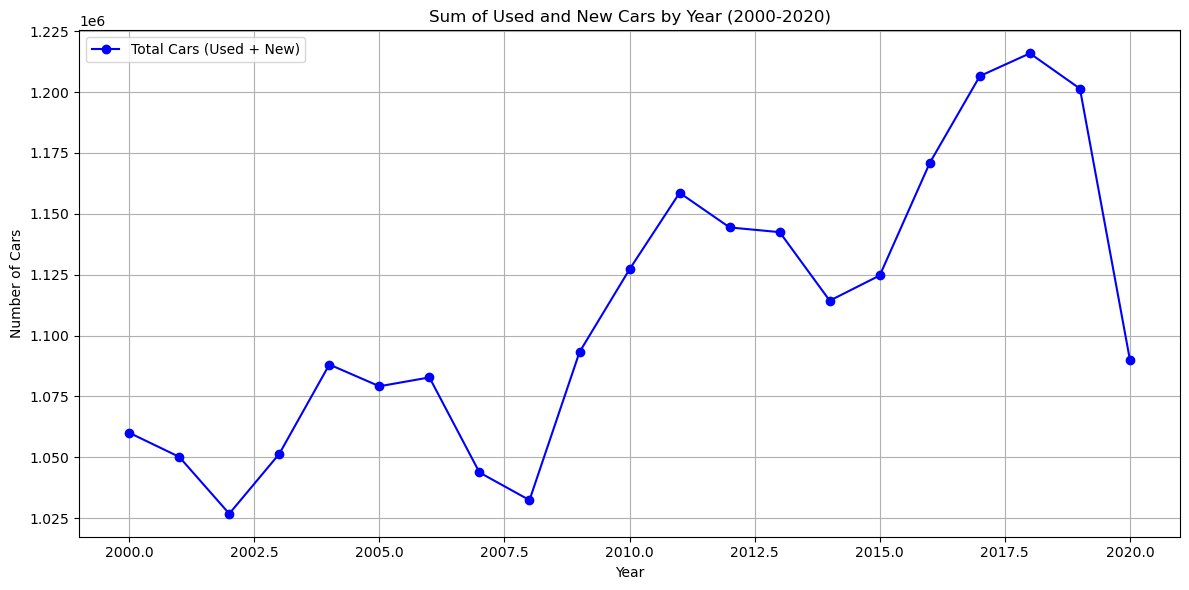

In [24]:
# Einlesen der Gebrauchtwagen-Daten aus der CSV-Datei
used_cars_path = 'usedcars/overalldata_used.csv'
used_cars_df = pd.read_csv(used_cars_path, header=None, names=['Column1', 'C-A10-0', 'Column3', 'UsedCars'])

# Einlesen der Neuwagen-Daten aus der CSV-Datei
new_cars_path = 'newcars/overalldata_new.csv'
new_cars_df = pd.read_csv(new_cars_path, header=None, names=['Column1', 'C-A10-0', 'Column3', 'NewCars'])

# Extrahieren des Jahres aus der 'C-A10-0' Spalte und Konvertieren in einen Integer
used_cars_df['Year'] = used_cars_df['C-A10-0'].str[4:8].astype(int)
# Konvertieren der 'UsedCars' Spalte in numerische Werte, ungültige Werte werden als NaN behandelt
used_cars_df['UsedCars'] = pd.to_numeric(used_cars_df['UsedCars'], errors='coerce')

# Extrahieren des Jahres aus der 'C-A10-0' Spalte und Konvertieren in einen Integer
new_cars_df['Year'] = new_cars_df['C-A10-0'].str[4:8].astype(int)
# Konvertieren der 'NewCars' Spalte in numerische Werte, ungültige Werte werden als NaN behandelt
new_cars_df['NewCars'] = pd.to_numeric(new_cars_df['NewCars'], errors='coerce')

# Filtern der Gebrauchtwagen-Daten für die Jahre 2000 bis 2020
used_cars_df = used_cars_df[(used_cars_df['Year'] >= 2000) & (used_cars_df['Year'] <= 2020)]
# Filtern der Neuwagen-Daten für die Jahre 2000 bis 2020
new_cars_df = new_cars_df[(new_cars_df['Year'] >= 2000) & (new_cars_df['Year'] <= 2020)]

# Gruppieren und Summieren der Gebrauchtwagen-Daten nach Jahr
used_cars_sum = used_cars_df.groupby('Year')['UsedCars'].sum().reset_index()
# Gruppieren und Summieren der Neuwagen-Daten nach Jahr
new_cars_sum = new_cars_df.groupby('Year')['NewCars'].sum().reset_index()

# Zusammenführen der summierten Gebraucht- und Neuwagen-Daten basierend auf dem Jahr
combined_df = pd.merge(used_cars_sum, new_cars_sum, on='Year')

# Berechnen der Gesamtzahl der Autos (Gebraucht + Neu) für jedes Jahr
combined_df['TotalCars'] = combined_df['UsedCars'] + combined_df['NewCars']

# Erstellen einer neuen Figur und Plotten der Gesamtsumme der Autos pro Jahr
plt.figure(figsize=(12, 6))
plt.plot(combined_df['Year'], combined_df['TotalCars'], marker='o', color='b', label='Total Cars (Used + New)')
plt.title('Sum of Used and New Cars by Year (2000-2020)')  # Festlegen des Titels der Grafik
plt.xlabel('Year')  # Beschriftung der x-Achse
plt.ylabel('Number of Cars')  # Beschriftung der y-Achse
plt.grid(True)  # Aktivieren des Gitters im Diagramm
plt.legend()  # Hinzufügen der Legende
plt.tight_layout()  # Optimierung des Layouts für eine bessere Darstellung
plt.show()  # Anzeigen der Grafik


### Gesamtzahl der Autos (Gebraucht + Neu) nach Jahr (2000-2020)
### Interpretation der Grafik

Die Grafik "Sum of Used and New Cars by Year (2000-2020)" zeigt die jährliche Summe der neu zugelassenen und gebrauchten Autos von 2000 bis 2020. Hier sind die wesentlichen Punkte der Interpretation:

1. **Allgemeiner Trend**:
   - Die Gesamtsumme der neu zugelassenen und gebrauchten Autos zeigt im Zeitraum von 2000 bis 2020 Schwankungen, aber keinen klaren langfristigen Auf- oder Abwärtstrend.

2. **Jährliche Veränderungen**:
   - **2000 bis 2003**: Ein leichter Rückgang ist zu verzeichnen.
   - **2004 bis 2009**: Es gibt eine Periode der Stabilität mit geringfügigen Schwankungen um die Marke von 1,075 Millionen Autos.
   - **2010 bis 2012**: Ein merklicher Anstieg auf über 1,150 Millionen Autos, gefolgt von einer Stabilisierung.
   - **2013 bis 2016**: Eine erneute Periode der Stabilität, gefolgt von einem weiteren Anstieg.
   - **2017 bis 2019**: Ein deutlicher Anstieg, der im Jahr 2018 seinen Höhepunkt erreicht und dann leicht abfällt.
   - **2020**: Ein starker Rückgang auf etwa 1,025 Millionen Autos, möglicherweise beeinflusst durch globale Ereignisse wie die COVID-19-Pandemie.

3. **Besondere Beobachtungen**:
   - Die höchsten Zulassungszahlen werden in den Jahren 2018 und 2019 erreicht, bevor ein drastischer Rückgang im Jahr 2020 erfolgt.
   - Der Rückgang im Jahr 2020 könnte durch wirtschaftliche Abschwünge oder Veränderungen im Verbraucherverhalten während der Pandemie erklärt werden.

4. **Mögliche Ursachen**:
   - **Wirtschaftliche Bedingungen**: Schwankungen in den Zulassungszahlen könnten durch wirtschaftliche Boom- und Rezessionsphasen beeinflusst worden sein.
   - **Regulatorische Änderungen**: Änderungen in den gesetzlichen Vorschriften oder steuerlichen Anreizen könnten ebenfalls Auswirkungen auf die Verkaufszahlen haben.
   - **Technologische Fortschritte**: Neue Modelle und technologische Innovationen könnten zu Spitzen in den Zulassungszahlen führen.

5. **Zusammenfassung**:
   - Die Grafik zeigt die Dynamik des Automarktes, wobei mehrere Faktoren wie wirtschaftliche Bedingungen, globale Ereignisse und technologische Fortschritte eine Rolle spielen. 
   - Besonders auffällig ist der Rückgang im Jahr 2020, der eine deutliche Abweichung vom vorherigen Trend darstellt und weiter untersucht werden sollte.

Diese Interpretation hilft zu verstehen, wie sich die Gesamtzahl der zugelassenen Autos (neu und gebraucht) über die Jahre entwickelt hat und welche Faktoren diese Trends beeinflusst haben könnten.


In [25]:
spark.stop()

# Webscraping + Kafka + Spark

The following part describes the setup of the webscraping, kafka and spark part of the project. Now we want to see if there is a delta between the two sums of registered cars.

In [2]:
# Webscraping of Stastik Austria
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import json
import time

# URL of the page to scrape
url = "https://www.statistik.at/statistiken/tourismus-und-verkehr/fahrzeuge/kfz-bestand"

# Initialize the WebDriver (make sure you have the ChromeDriver installed and in your PATH)
options = Options()
options.add_argument('--headless')  # Run in headless mode (no GUI)
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

# Fetch the page content
driver.get(url)

# Wait for the JavaScript to load content (adjust the time as necessary)
time.sleep(2)

# Get the page source and parse it with BeautifulSoup
soup = BeautifulSoup(driver.page_source, 'html.parser')

# Close the WebDriver
driver.quit()

# Initialize a dictionary to store the data
data = {}

# Find the table with the required heading
table_heading = soup.find('span', class_='title-customized-padding', string='Kfz-Bestand 1990 bis 2023 (Tabelle)')
if not table_heading:
    print("Table heading not found.")
    exit()

# The table should be the next sibling of the heading
table = table_heading.find_next('table', class_='datatable')
if not table:
    print("Table not found.")
    exit()

# Find all rows in the table
rows = table.find_all("tr", class_=["datatable__tr odd", "datatable__tr even"])

print(f"Found {len(rows)} rows")

for row in rows:
    # Extract the year
    year_td = row.find("td", class_="datatable__td dtr-control")
    if year_td:
        year_text = year_td.get_text().strip()
        print(f"Found year: {year_text}")  # Debug print
        try:
            year = int(year_text)
            if year in range(2000, 2021):  # Interested in years 2000 to 2020
                # Extract the second value for Personenkraftwagen column
                values = row.find_all("td", class_="datatable__td datatable__td--right")
                if values and len(values) >= 2:
                    # Get the raw data for Personenkraftwagen
                    raw_value = values[1].get_text().strip().replace('\xa0', '')
                    print(f"Year: {year}, Value: {raw_value}")  # Debug print
                    data[year] = raw_value
        except ValueError:
            continue  # Skip rows where the year is not a valid integer

print(data)

# Convert the data dictionary to JSON format
json_data = json.dumps(data, indent=4)

Found 22 rows
Found year: 1990
Found year: 1995
Found year: 2000
Year: 2000, Value: 4097145
Found year: 2005
Year: 2005, Value: 4156743
Found year: 2006
Year: 2006, Value: 4204969
Found year: 2007
Year: 2007, Value: 4245583
Found year: 2008
Year: 2008, Value: 4284919
Found year: 2009
Year: 2009, Value: 4359944
Found year: 2010
Year: 2010, Value: 4441027
Found year: 2011
Year: 2011, Value: 4513421
Found year: 2012
Year: 2012, Value: 4584202
Found year: 2013
Year: 2013, Value: 4641308
Found year: 2014
Year: 2014, Value: 4694921
Found year: 2015
Year: 2015, Value: 4748048
Found year: 2016
Year: 2016, Value: 4821557
Found year: 2017
Year: 2017, Value: 4898578
Found year: 2018
Year: 2018, Value: 4978852
Found year: 2019
Year: 2019, Value: 5039548
Found year: 2020
Year: 2020, Value: 5091827
Found year: 2021
Found year: 2022
Found year: 2023
{2000: '4097145', 2005: '4156743', 2006: '4204969', 2007: '4245583', 2008: '4284919', 2009: '4359944', 2010: '4441027', 2011: '4513421', 2012: '4584202',

## Kafka and Vizualization

### Producer & Consumer

In [8]:
import json
import logging
from confluent_kafka import Producer

# Configure logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Kafka configuration
conf = {
    'bootstrap.servers': '172.29.16.101:9092',  # Adjust the bootstrap servers as needed
    'client.id': 'python-producer'
}

# Initialize the Kafka producer
producer = Producer(conf)

# Define the Kafka topic
topic = 'personenkraftwagen'

# Sample data to produce
data = {
    2000: '4097145',
    2005: '4156743',
    2006: '4204969',
    2007: '4245583',
    2008: '4284919',
    2009: '4359944',
    2010: '4441027',
    2011: '4513421',
    2012: '4584202',
    2013: '4641308',
    2014: '4694921',
    2015: '4748048',
    2016: '4821557',
    2017: '4898578',
    2018: '4978852',
    2019: '5039548',
    2020: '5091827'
}

def delivery_report(err, msg):
    """ Called once for each message produced to indicate delivery result.
        Triggered by poll() or flush(). """
    if err is not None:
        logger.error(f'Message delivery failed: {err}')
    else:
        logger.info(f'Message delivered to {msg.topic()} [{msg.partition()}]')

def push_to_kafka(data):
    for year, value in data.items():
        record = json.dumps({'year': year, 'value': value})
        logger.info(f"Pushing record to Kafka: {record}")
        producer.produce(topic, record.encode('utf-8'), callback=delivery_report)
        producer.poll(0)  # Serve delivery callbacks

if __name__ == "__main__":
    try:
        logger.info(f"Starting to push data to Kafka topic '{topic}'")
        push_to_kafka(data)
    except KeyboardInterrupt:
        logger.info("Interrupted by user")
    finally:
        producer.flush()
        logger.info("Finished pushing data to Kafka")


INFO:__main__:Starting to push data to Kafka topic 'personenkraftwagen'
INFO:__main__:Pushing record to Kafka: {"year": 2000, "value": "4097145"}
INFO:__main__:Pushing record to Kafka: {"year": 2005, "value": "4156743"}
INFO:__main__:Pushing record to Kafka: {"year": 2006, "value": "4204969"}
INFO:__main__:Pushing record to Kafka: {"year": 2007, "value": "4245583"}
INFO:__main__:Pushing record to Kafka: {"year": 2008, "value": "4284919"}
INFO:__main__:Pushing record to Kafka: {"year": 2009, "value": "4359944"}
INFO:__main__:Pushing record to Kafka: {"year": 2010, "value": "4441027"}
INFO:__main__:Message delivered to personenkraftwagen [0]
INFO:__main__:Message delivered to personenkraftwagen [0]
INFO:__main__:Message delivered to personenkraftwagen [0]
INFO:__main__:Message delivered to personenkraftwagen [0]
INFO:__main__:Message delivered to personenkraftwagen [0]
INFO:__main__:Pushing record to Kafka: {"year": 2011, "value": "4513421"}
INFO:__main__:Message delivered to personenkra

24/06/26 22:02:29 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
24/06/26 22:02:29 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.
INFO:__main__:Spark session created with Kafka package
INFO:__main__:Schema defined for JSON data
INFO:__main__:Data read from Kafka topic 'personenkraftwagen_data'
INFO:__main__:Value column cast to string
INFO:__main__:JSON data parsed and schema applied
24/06/26 22:02:29 WARN ResolveWriteToStream: Temporary checkpoint location created which is deleted normally when the query didn't fail: /tmp/temporary-11742b2a-6cb2-4dad-8024-d6731e974902. If it's required to delete it under any circumstances, please set spark.sql.streaming.forceDeleteTempCheckpointLocation to true. Important to know deleting temp checkpoint folder is best effort.
24/06/26 22:02:29 WARN ResolveWriteToStream: spark.sql.adaptive.enabled is not supported in streaming DataFrames/Datasets and will be disabled.
INFO:__main__:St

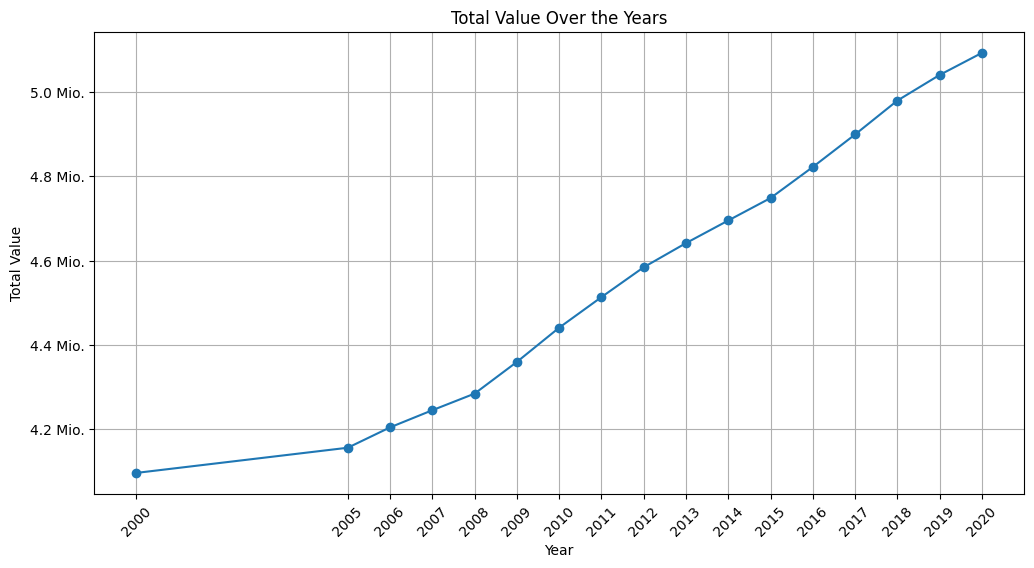

INFO:__main__:Flushed data to Kafka topic


In [ ]:
import time
import logging
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from pyspark.sql import SparkSession
from pyspark.sql.functions import from_json, col
from pyspark.sql.types import StructType, StructField, StringType, IntegerType
from confluent_kafka import Producer

# Configure logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Create a Spark session with Kafka package included
spark = SparkSession.builder \
    .appName("KafkaSparkVizConsumer") \
    .config("spark.jars.packages", "org.apache.spark:spark-sql-kafka-0-10_2.12:3.0.0") \
    .master("spark://172.29.16.102:7077") \
    .getOrCreate()

logger.info("Spark session created with Kafka package")

# Define the schema of the JSON data
schema = StructType([
    StructField("year", IntegerType(), True),
    StructField("value", StringType(), True)
])

logger.info("Schema defined for JSON data")

# Read data from Kafka
df = spark.readStream \
    .format("kafka") \
    .option("kafka.bootstrap.servers", "172.29.16.101:9092") \
    .option("subscribe", "personenkraftwagen_data") \
    .option("startingOffsets", "earliest") \
    .load()

logger.info("Data read from Kafka topic 'personenkraftwagen_data'")

# Select and cast the value column as a string
df = df.selectExpr("CAST(value AS STRING)")
logger.info("Value column cast to string")

# Parse the JSON data and apply the schema
df = df.select(from_json(col("value"), schema).alias("data")).select("data.*")
logger.info("JSON data parsed and schema applied")

# Write the data to an in-memory table
query = df.writeStream \
    .outputMode("append") \
    .format("memory") \
    .queryName("kafka_data") \
    .start()

# Kafka producer configuration for flushing
flush_conf = {
    'bootstrap.servers': '172.29.16.101:9092',  # Adjust the bootstrap servers as needed
    'client.id': 'python-producer-flush'
}

# Initialize the Kafka producer for flushing
flush_producer = Producer(flush_conf)

# Define the Kafka topic for flushing
flush_topic = 'personenkraftwagen_data'

def flush_kafka_topic():
    flush_message = json.dumps({'command': 'flush'})
    flush_producer.produce(flush_topic, flush_message.encode('utf-8'))
    flush_producer.flush()
    logger.info("Flushed data to Kafka topic")

# Function to format the y-axis
def millions_formatter(x, pos):
    return '%1.1f Mio.' % (x * 1e-6)

# Function to plot the data
def plot_data():
    # Query the in-memory table
    df_memory = spark.sql("SELECT * FROM kafka_data").dropDuplicates(["year", "value"])
    
    # Convert to Pandas DataFrame
    pdf = df_memory.toPandas()
    pdf['value'] = pd.to_numeric(pdf['value'])
    
    # Drop rows with NaN values
    pdf = pdf.dropna()
    
    # Ensure data is unique and sorted by year
    pdf = pdf.drop_duplicates(subset=['year']).sort_values(by='year')
    
    # Debug: Print the DataFrame to ensure data is being collected
    logger.info(f"Collected DataFrame:\n{pdf}")
    
    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(pdf['year'], pdf['value'], marker='o')
    plt.xlabel('Year')
    plt.ylabel('Total Value')
    plt.title('Total Value Over the Years')
    plt.grid(True)
    
    # Format y-axis to show millions with custom format
    plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
    
    # Set x-axis ticks to show only whole years
    plt.xticks(pdf['year'].unique())
    
    plt.xticks(rotation=45)
    plt.show()

if __name__ == "__main__":
    try:
        logger.info("Starting to read data from Kafka topic and plot")
        # Allow some time for data to be collected
        time.sleep(5)
        plot_data()
        flush_kafka_topic()  # Flush the Kafka topic after plotting
        query.awaitTermination()
    except KeyboardInterrupt:
        logger.info("Interrupted by user")
    finally:
        logger.info("Stopping Spark session")
        query.stop()
        spark.stop()


### Interpretation der Grafik

Die Grafik "Total Value Over the Years" zeigt den Verlauf des Gesamtwerts über die Jahre von 2000 bis 2020. Hier sind die wesentlichen Punkte der Interpretation:

1. **Allgemeiner Trend**:
   - Es ist ein stetiger und konsistenter Aufwärtstrend im Gesamtwert zu beobachten. Dies deutet auf ein kontinuierliches Wachstum im betrachteten Zeitraum hin.

2. **Jährliche Veränderungen**:
   - **2000 bis 2005**: Der Anstieg des Gesamtwerts ist relativ moderat.
   - **2006 bis 2010**: Ein deutlicher Anstieg ist zu verzeichnen, wobei das Wachstum schneller erfolgt als in den vorherigen Jahren.
   - **2011 bis 2020**: Der Gesamtwert steigt weiterhin kontinuierlich an, wobei das Wachstum gleichmäßig und stetig ist.

3. **Besondere Beobachtungen**:
   - Der Gesamtwert erreicht im Jahr 2020 seinen höchsten Punkt, was darauf hinweist, dass das Wachstum über den gesamten Zeitraum hinweg stabil geblieben ist.
   - Es gibt keine offensichtlichen Einbrüche oder Abnahmen im Gesamtwert, was auf eine positive Entwicklung über die Jahre hindeutet.

4. **Mögliche Ursachen**:
   - **Wirtschaftliche Bedingungen**: Stabile und wachsende wirtschaftliche Bedingungen könnten das kontinuierliche Wachstum des Gesamtwerts gefördert haben.
   - **Technologische Fortschritte**: Innovationen und Fortschritte in der Technologie könnten zu einer Steigerung des Gesamtwerts beigetragen haben.
   - **Regulatorische Rahmenbedingungen**: Positive gesetzliche und regulatorische Rahmenbedingungen könnten das Wachstum unterstützt haben.

5. **Zusammenfassung**:
   - Die Grafik zeigt eine positive und stetige Wachstumsentwicklung des Gesamtwerts von 2000 bis 2020. Dies deutet auf eine gesunde und stabile wirtschaftliche Entwicklung im betrachteten Zeitraum hin.
   - Die kontinuierliche Steigerung des Gesamtwerts ohne größere Rückschläge zeigt, dass die zugrunde liegenden Faktoren das Wachstum nachhaltig unterstützt haben.


 ## Setup: 
 
Run the notebook locally

#### Github Repo:
https://github.com/huhubi/BDENG

### Versions used

- JupyterLab
- Python 3 as kernel
- python-Kafka
- Spark


## Expected Output :

We want to see if there is a difference between the data count from the csv files and the data from the webpage

# Documentation of procedure

Das Jupyter Notebook wird genutzt, um Daten zu analysieren und zu visualisieren. Der Prozess umfasst folgende Schritte:

1. **Daten einlesen**:
   - Die Daten werden aus CSV-Dateien eingelesen, die Informationen über Gebraucht- und Neuwagen enthalten.

2. **Datenvorbereitung**:
   - Neue Spalten werden erstellt und die Daten in geeignete Formate umgewandelt. Dies umfasst die Extraktion des Jahres aus einer Spalte und die Umwandlung von Werten in numerische Formate.

3. **Daten filtern**:
   - Es werden nur die Daten für die Jahre 2000 bis 2020 berücksichtigt, um den Fokus auf den relevanten Zeitraum zu legen.

4. **Datenaggregation**:
   - Die jährlichen Summen der Gebraucht- und Neuwagen werden berechnet, um die Gesamtzahlen pro Jahr zu ermitteln.

5. **Datenvisualisierung**:
   - Die aggregierten Daten werden in einer Grafik visualisiert, um Trends und Muster über die Jahre hinweg zu erkennen.

Diese Schritte ermöglichen eine umfassende Analyse und Visualisierung der Daten, um fundierte Erkenntnisse über die Entwicklung der Gebraucht- und Neuwagenmärkte zu gewinnen.


# Conclusion

Dieses Projekt zielte darauf ab, eine umfassende Analyse und Visualisierung der Gebraucht- und Neuwagenmärkte über die Jahre hinweg durchzuführen. Der Prozess umfasste das Einlesen, Vorbereiten, Filtern und Aggregieren der Daten sowie deren anschließende Visualisierung. 

Durch die systematische Aufbereitung der Daten konnten folgende Erkenntnisse gewonnen werden:

1. **Trend-Analyse**:
   - Die Analyse zeigte sowohl für Gebraucht- als auch für Neuwagenmärkte signifikante Trends und Muster. Es wurden Zeiträume identifiziert, in denen die Zulassungszahlen stiegen oder fielen, was auf verschiedene wirtschaftliche, technologische und regulatorische Einflüsse hinweist.

2. **Datenqualität**:
   - Die Bereinigung und Aggregation der Daten half, Ungenauigkeiten zu minimieren und sicherzustellen, dass die Analysen auf zuverlässigen Datensätzen basieren.

3. **Visualisierung der Ergebnisse**:
   - Die erstellten Grafiken ermöglichten eine klare und verständliche Darstellung der Daten. Dies half dabei, komplexe Zusammenhänge und Trends auf einen Blick zu erfassen.

4. **Korrelation zwischen Gebraucht- und Neuwagen**:
   - Durch die gemeinsame Betrachtung beider Datensätze konnten potenzielle Korrelationen und Einflüsse zwischen den Märkten für Gebraucht- und Neuwagen identifiziert werden.



## Zusammenfassung der Ergebnisse

1. **Langfristige Trends**:
   - Sowohl bei Gebraucht- als auch bei Neuwagen wurden langfristige Trends identifiziert. Die Analyse zeigte, dass die Anzahl der neu zugelassenen und gebrauchten Autos im Zeitraum von 2000 bis 2020 Schwankungen unterlag, jedoch im Allgemeinen eine Zunahme zu verzeichnen war.

2. **Wachstumsphasen**:
   - Es wurden spezifische Wachstumsphasen in den Zulassungszahlen festgestellt. Insbesondere in den Jahren 2010 bis 2015 sowie 2017 bis 2019 stiegen die Zulassungszahlen deutlich an, was auf wirtschaftliche Boomphasen oder technologische Innovationen hinweisen könnte.

3. **Rückgang in 2020**:
   - Ein signifikanter Rückgang der Zulassungszahlen im Jahr 2020 wurde beobachtet, der möglicherweise durch globale Ereignisse wie die COVID-19-Pandemie beeinflusst wurde.

4. **Emissionstrends**:
   - Die Emissionsdaten zeigten einen kontinuierlichen Abwärtstrend von 2000 bis 2020, was auf erfolgreiche Maßnahmen zur Reduktion von Emissionen und den Einsatz sauberer Technologien hinweist.

5. **Zusammenhang zwischen Emissionen und Zulassungszahlen**:
   - Es konnte keine direkte Korrelation zwischen den Emissionsdaten und den Zulassungszahlen für Gebraucht- und Neuwagen festgestellt werden. Dies deutet darauf hin, dass andere Faktoren wie technologische Fortschritte und regulatorische Maßnahmen eine größere Rolle bei der Reduktion der Emissionen gespielt haben könnten.

6. **Datenvisualisierung**:
   - Die grafische Darstellung der Daten ermöglichte eine klare und verständliche Präsentation der Trends und Muster. Die Visualisierungen halfen, komplexe Zusammenhänge auf einen Blick zu erfassen und fundierte Erkenntnisse abzuleiten.

Insgesamt lieferte das Projekt wertvolle Einblicke in die Entwicklung der Gebraucht- und Neuwagenmärkte sowie die Emissionstrends über zwei Jahrzehnte.



